In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("L&T.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (7654, 5)


,Open,High,Low,Close,Volume
0,21.388887,21.388887,21.388887,21.388887,0.0
1,NaN,NaN,NaN,NaN,NaN
2,21.666666,21.666666,21.666666,21.666666,0.0
3,NaN,NaN,NaN,NaN,NaN
4,21.944445,21.944445,21.944445,21.944445,0.0


In [3]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Close_Tom'] =  df['Close']
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,21.388887,21.388887,21.388887,0.0,21.388887,21.388887
1,NaN,NaN,NaN,NaN,NaN,NaN
2,21.666666,21.666666,21.666666,0.0,21.666666,21.666666
3,NaN,NaN,NaN,NaN,NaN,NaN
4,21.944445,21.944445,21.944445,0.0,21.944445,21.944445


In [4]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close_Tom'] =  df['Close_Tom'].shift(-1)
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,21.388887,21.388887,21.388887,0.0,21.388887,NaN
1,NaN,NaN,NaN,NaN,NaN,21.666666
2,21.666666,21.666666,21.666666,0.0,21.666666,NaN
3,NaN,NaN,NaN,NaN,NaN,21.944445
4,21.944445,21.944445,21.944445,0.0,21.944445,NaN


In [5]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_Tom']]
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,21.388887,21.388887,21.388887,0.0,21.388887,NaN
1,NaN,NaN,NaN,NaN,NaN,21.666666
2,21.666666,21.666666,21.666666,0.0,21.666666,NaN
3,NaN,NaN,NaN,NaN,NaN,21.944445
4,21.944445,21.944445,21.944445,0.0,21.944445,NaN


In [6]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Volume       0
Close        0
Close_Tom    0
dtype: int64

<AxesSubplot:>

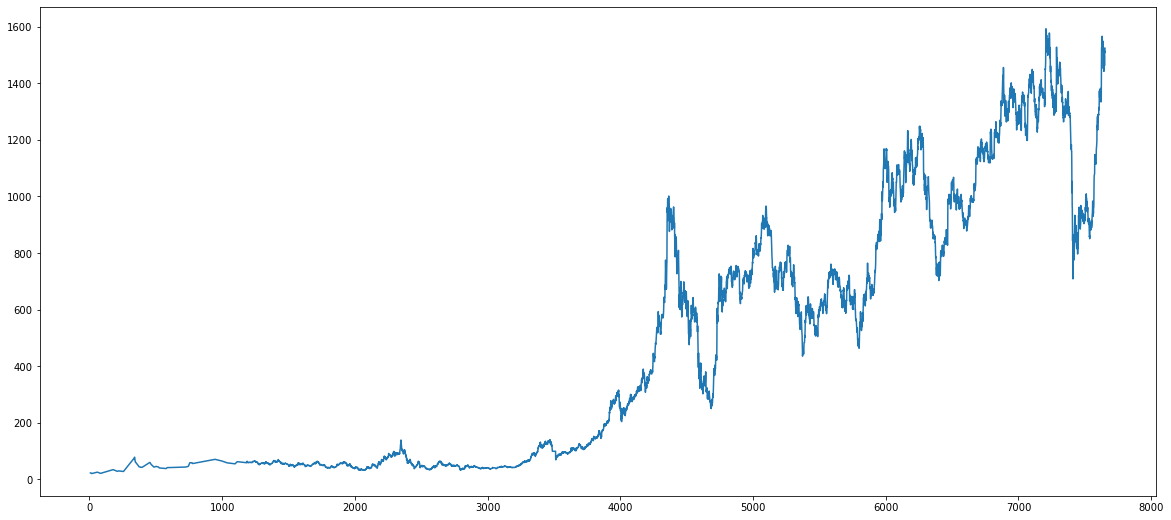

In [7]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [8]:
#columns for x and y
x  = df[['Open','High','Low','Volume', 'Close']]
y = df['Close_Tom']

In [9]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])
df.head()

,Open,High,Low,Volume,Close,Close_Tom
7,0.001411,0.001401,0.001436,0.0,0.001413,22.222221
8,0.001411,0.001401,0.001436,0.0,0.001413,22.222221
9,0.001411,0.001401,0.001436,0.0,0.001413,22.222221
10,0.001411,0.001401,0.001436,0.0,0.001413,22.222221
11,0.001411,0.001401,0.001436,0.0,0.001413,22.222221


In [10]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4909, 5)
(1637, 5)
(4909,)
(1637,)


---
# Random Forest

In [11]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [12]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
2931,40.866665,40.733666,0.132999
3790,139.583328,140.365166,0.781838
6316,1034.566650,1025.003178,9.563472
5972,1005.533325,1015.410872,9.877547
3602,88.311111,89.486222,1.175111
2039,32.133331,34.146333,2.013002
7132,1313.400024,1292.973499,20.426525
4939,728.844421,715.931890,12.912531
2754,45.711109,44.684999,1.026110
6250,1207.266724,1216.168502,8.901778


In [13]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.999137736292638
Mean Absolute Error: 7.984822595553673
Mean Squared  Error: 186.3734115495105
Root Mean Squared Error: 13.65186476454812
Loss: 7.984822595553673


---
# k-NN

In [14]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [15]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
2931,40.866665,234.544449,193.677784
3790,139.583328,196.538883,56.955555
6316,1034.566650,1146.091645,111.524995
5972,1005.533325,617.616669,387.916656
3602,88.311111,294.277767,205.966656
2039,32.133331,139.783335,107.650004
7132,1313.400024,1294.000000,19.400024
4939,728.844421,772.222198,43.377777
2754,45.711109,82.911112,37.200003
6250,1207.266724,1294.000000,86.733276


In [16]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [17]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.7703149078235005
Mean Absolute Error: 144.65181283078803
Mean Squared  Error: 49645.13042299157
Root Mean Squared Error: 222.81187226669851
Loss: 144.65181283078803


---
# Decision Tree

In [18]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
2931,40.866665,40.833332,0.033333
3790,139.583328,137.994446,1.588882
6316,1034.566650,1022.400024,12.166626
5972,1005.533325,1021.066650,15.533325
3602,88.311111,88.666664,0.355553
2039,32.133331,35.755554,3.622223
7132,1313.400024,1282.599976,30.800048
4939,728.844421,713.711121,15.133300
2754,45.711109,43.711109,2.000000
6250,1207.266724,1249.349976,42.083252


In [20]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9983926989751337
Mean Absolute Error: 10.70595293273846
Mean Squared  Error: 347.4090035724958
Root Mean Squared Error: 18.638911008224053
Loss: 10.70595293273846


---
# Linear Regression

In [21]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-4.02830594e-02  2.21659317e-02 -1.06358972e-01 -4.30631295e-08
  1.12282579e+00]
0.2580995455244306


In [23]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
2931,40.866665,41.227770,0.361105
3790,139.583328,138.563162,1.020166
6316,1034.566650,1029.891159,4.675491
5972,1005.533325,1023.735230,18.201905
3602,88.311111,89.332311,1.021200
2039,32.133331,33.278393,1.145062
7132,1313.400024,1295.732166,17.667858
4939,728.844421,715.406217,13.438204
2754,45.711109,45.385277,0.325832
6250,1207.266724,1212.737565,5.470841


In [24]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9992476957493333
Mean Absolute Error: 7.243290246582294
Mean Squared  Error: 162.60629842454756
Root Mean Squared Error: 12.751717469601793
Loss: 7.243290246582294
